# 画像認識のサンプルコード
## 1. 手書き数字の画像データから学習を行う

In [1]:
# データの読み込み

from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images # 画像データ
X = digits.data        # 画像データ(平坦化後)
y = digits.target      # ラベル(数字)

print('Shape of images: ', images.shape)
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

Shape of images:  (1797, 8, 8)
Shape of X:  (1797, 64)
Shape of y:  (1797,)


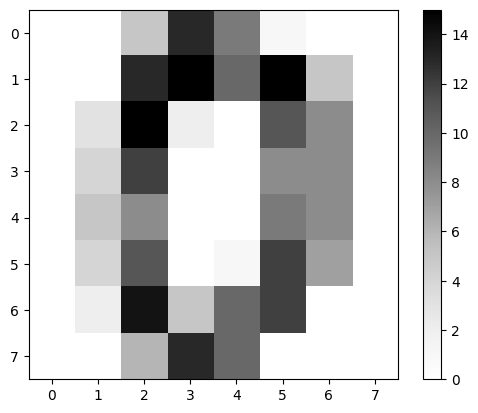

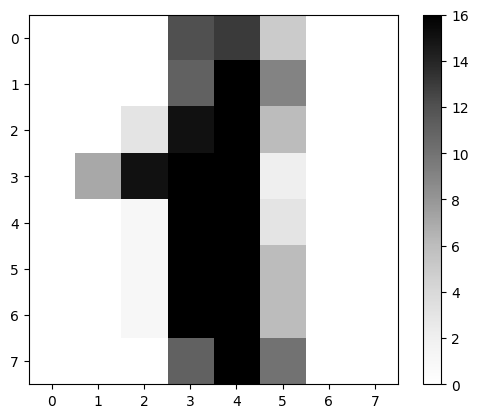

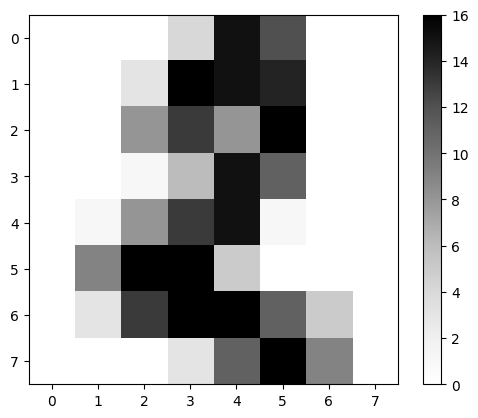

In [2]:
# 画像データを描画してみる

import matplotlib.pyplot as plt
%matplotlib inline

for i in range(3):
  plt.figure()
  plt.imshow(images[i,:,:], cmap='Greys')
  plt.colorbar()

In [3]:
# 画像データ(平坦化後)の確認

for i in range(3):
  print(f'X[{i},:] =')
  print(X[i,:])

X[0,:] =
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
X[1,:] =
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
X[2,:] =
[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]


In [5]:
# ラベル(数字)の確認

for i in range(3):
  print(f'y[{i}] = ', y[i])

y[0] =  0
y[1] =  1
y[2] =  2


In [6]:
# 学習データとテストデータに分割する

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (1257, 64)
Shape of X_test:  (540, 64)
Shape of y_train:  (1257,)
Shape of y_test:  (540,)


In [8]:
# 学習を行う (学習データを使う)

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='relu', random_state=0)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0)

In [9]:
# 学習結果の検証を行う (テストデータを使う)

print('Score (training data): ', clf.score(X_train, y_train))
print('Score (test data):     ', clf.score(X_test, y_test))

Score (training data):  1.0
Score (test data):      0.9648148148148148


true label:      8
predicted label: 7


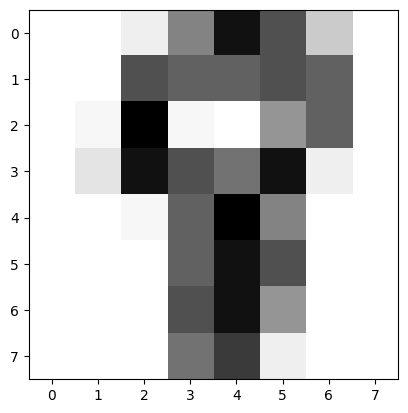

true label:      4
predicted label: 1


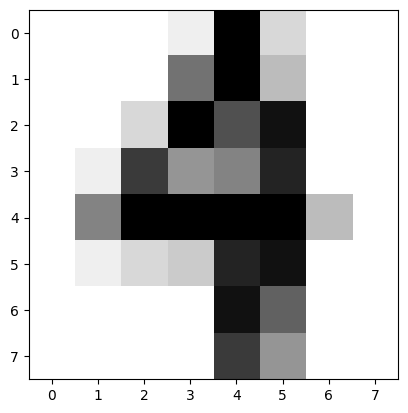

true label:      8
predicted label: 1


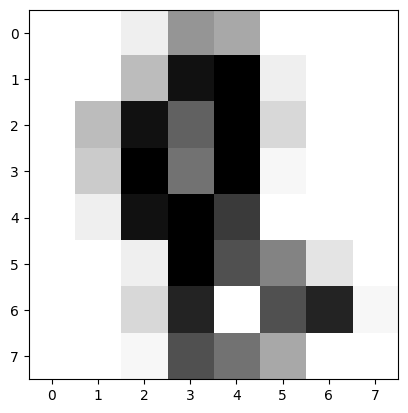

true label:      9
predicted label: 3


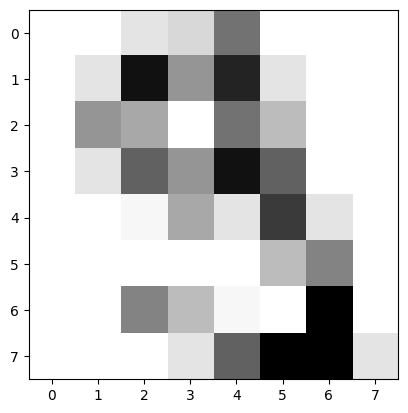

true label:      9
predicted label: 5


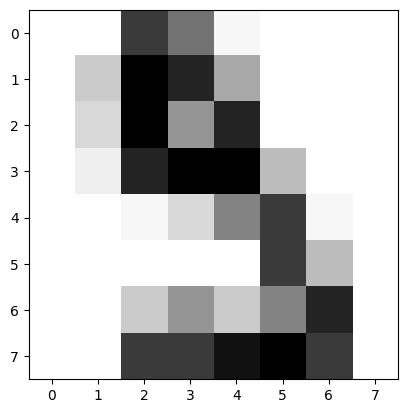

true label:      9
predicted label: 3


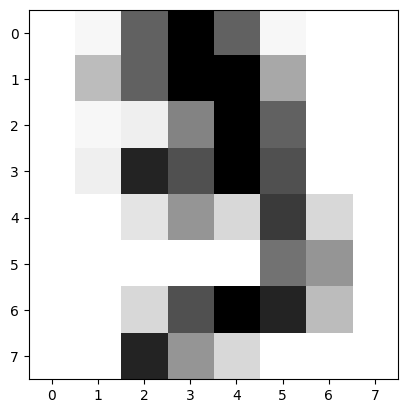

true label:      4
predicted label: 9


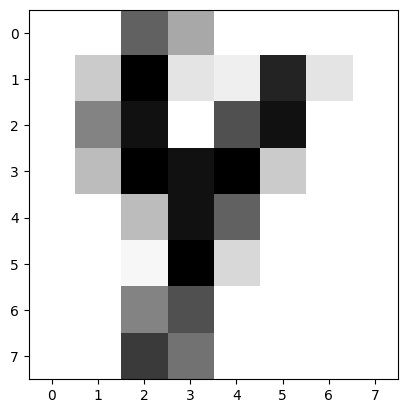

true label:      8
predicted label: 1


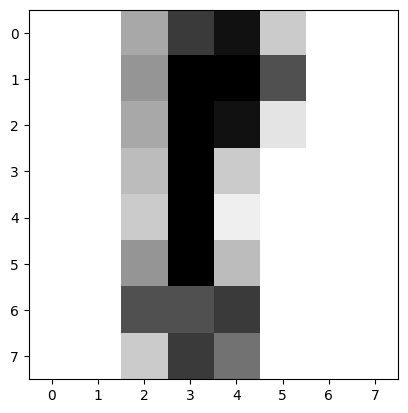

true label:      3
predicted label: 5


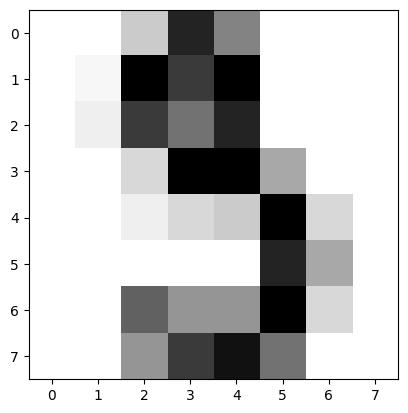

true label:      7
predicted label: 3


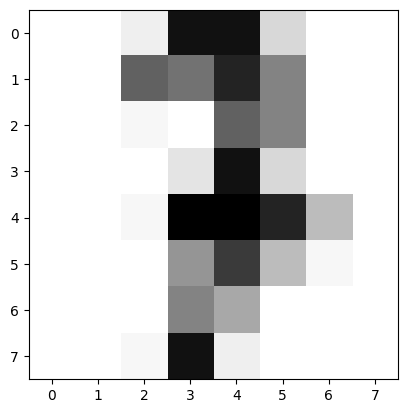

true label:      1
predicted label: 9


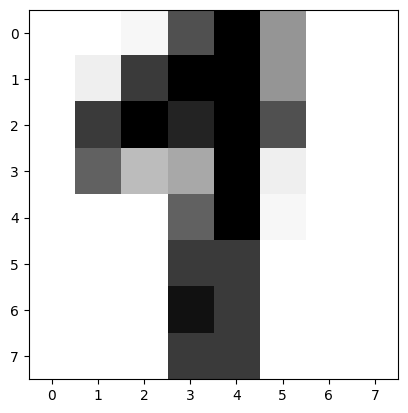

true label:      6
predicted label: 1


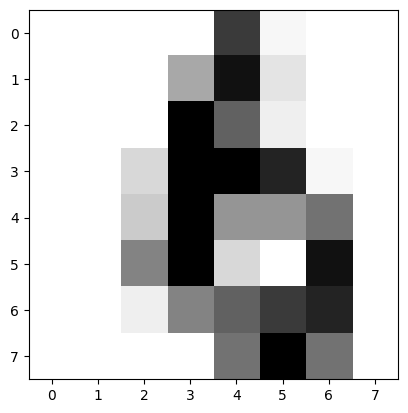

true label:      8
predicted label: 1


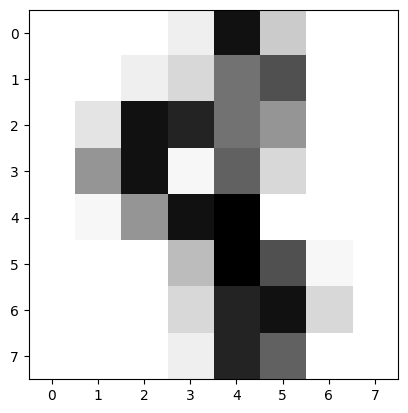

true label:      5
predicted label: 8


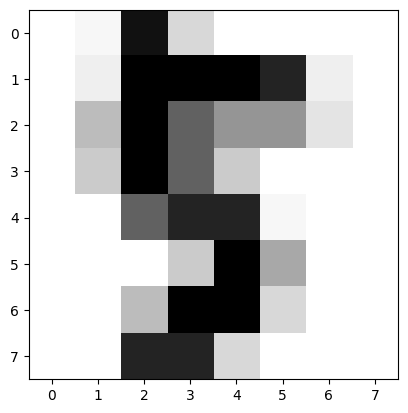

true label:      0
predicted label: 8


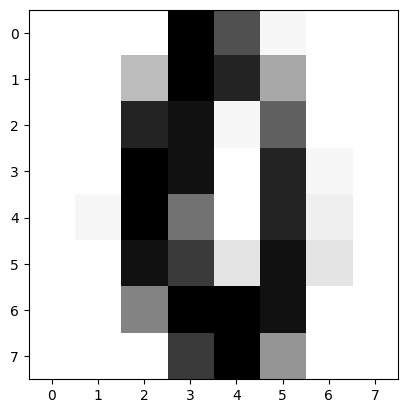

true label:      3
predicted label: 5


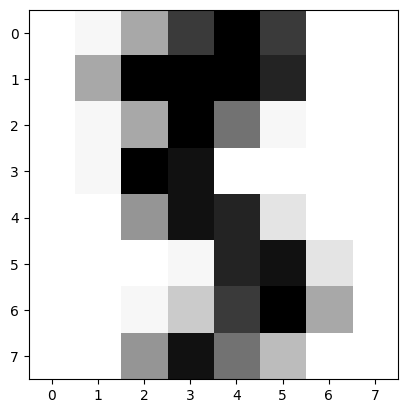

true label:      3
predicted label: 8


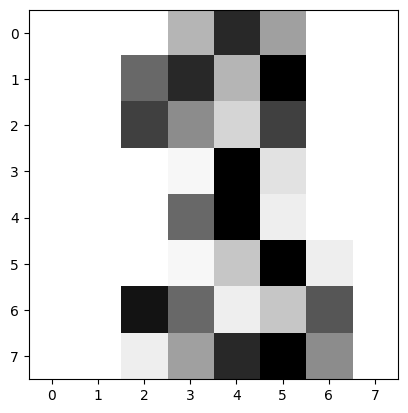

true label:      3
predicted label: 9


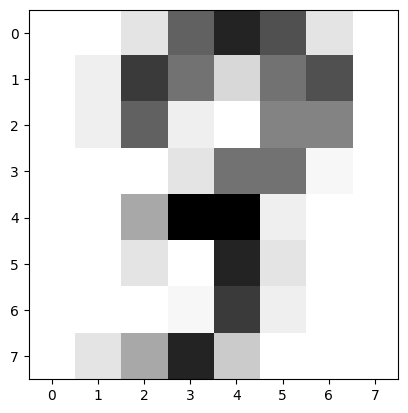

true label:      1
predicted label: 8


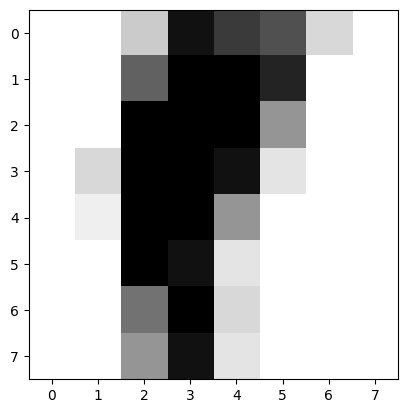

In [14]:
# 予測に失敗した画像データを確認する

import numpy as np

y_pred = clf.predict(X_test)
indices = np.where(y_test != y_pred)[0]

for i in indices:
  print(f'true label:     ', y_test[i])
  print(f'predicted label:', y_pred[i])
  plt.figure()
  plt.imshow(X_test[i,:].reshape(8, 8), cmap='Greys')
  plt.show()

## 2. 学習済みモデルを使って物体検出を行う

In [33]:
# 学習済みモデルのダウンロード

!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15921, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 15921 (delta 17), reused 28 (delta 13), pack-reused 15880
Receiving objects: 100% (15921/15921), 14.66 MiB | 20.91 MiB/s, done.
Resolving deltas: 100% (10916/10916), done.


In [34]:
# ライブラリのインストール

!pip install -r yolov5/requirements.txt

In [36]:
# 物体検出

!python yolov5/detect.py --source test.jpg --weights yolov5/yolov5s.pt --conf 0.3 --name demo --exist-ok

detect: weights=['yolov5/yolov5s.pt'], source=test.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=demo, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CPU

100% 14.1M/14.1M [00:00<00:00, 118MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/test.jpg: 640x640 1 dog, 501.6ms
Speed: 4.3ms pre-process, 501.6ms inference, 26.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/demo
